# Linear regression using core python

This code explains Andrew Ng's tutorial on linear regression without using any machine learning framework. Below are the basic steps.

1. Preprocessing
2. Choosing hypotheis function
3. Choosing loss and cost function
4. Perform gradient descent

## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Loading input data

To explain this tutorial, housing price prediction based on given area problem is used. Here `X` represents area in square feet and `Y` represents price of the sqaure feet

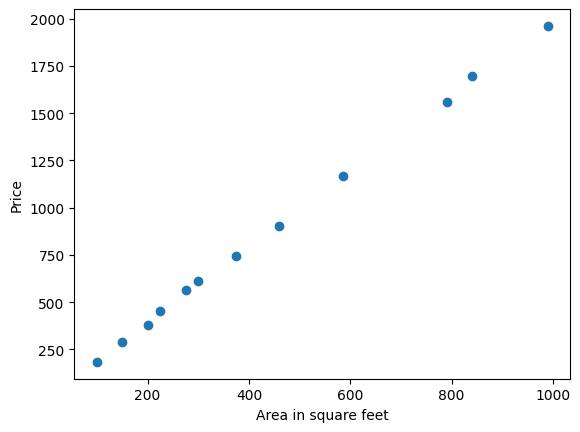

In [5]:
X_train = np.array([100, 150, 200, 225, 275, 300, 375, 460, 585, 790, 840, 990]) # area
Y_train = np.array([184,  288,  382,  452,  566,  614,  746,  902, 1170, 1562, 1696, 1962]) # price

# X_train = np.random.randint(500, 3500, 100)
# Y_train = 50 + 0.1 * X_train + np.random.normal(0, 50, 100)

plt.xlabel('Area in square feet')
plt.ylabel('Price')
plt.scatter(X_train, Y_train)
plt.show()

## 1. Preprocessing

#### Normalization of input data / features (OR) Feature Scaling

Features can have numbers with higher value for e.g. stock price = 1000, housing price = 4500, and if we use this number for calculation it will result in big numbers for computer to calculate so, it is good practise to normalize data within -1 to 1 for efficient calculation.

Above data can be normalized using [Mean normalization](../FAQ.md#what-is-mean-normalization)

In [6]:
def normalize(M, mean, standard_deviation):
    return (M - mean) / standard_deviation

def de_normalize(M, mean, standard_deviation):
    return M * standard_deviation + mean

## 2. Choosing hypotheis function

Just by seeing the above, we shall deduce that a straight line is a best model for this problem. Mathematically straight line equation can be acheived using linear regression i.e y = c + mx (OR) y = w<sub>0</sub> * 1 + w<sub>1</sub> * x. Our goal is to identify the weights which can draw a perfect straight approximately passing through all feature points in the above graph by adjusting w<sub>0</sub> and w<sub>1</sub>.

For multiple data above equation can be written as

$$
y^{(0)} = w_0 \times 1 + w_1 \times x^{(0)}\\
$$
$$
y^{(1)} = w_0 \times 1 + w_1 \times x^{(1)}\\
$$
$$
.\\
$$
$$
.\\
$$
$$
y^{(m)} = w_0 \times 1 + w_1 \times x^{(m)}$$

Above equation can also be written in matrix form.

$$
\begin{bmatrix}
y^{(0)}\\
y^{(1)}\\
.\\
.\\
y^{(m)}\\
\end{bmatrix}_{m \times 1} = \begin{bmatrix}
1 & x^{(0)}\\
1 & x^{(1)}\\
.\\
.\\
1 & x^{(m)}\\
\end{bmatrix}_{m \times 2} \times  \begin{bmatrix}
w_0\\
w_1
\end{bmatrix}_{2 \times 1}

$$

In [7]:
def hypothesis_function(X, W):
    return np.matmul(X, W)

## 3. Choosing loss and cost function

To find exact weight parameters, we first choose a random weight (which draws a random line in the graph for thr given x) and calculate y(rand). Now we can find square error of (y(rand) - y) ^ 2. We have to repeat this until we find minimal loss and that should be the straignt line or weight paramter we expect.

So Cost function we are going to choose is mean squared error loss function which is very popular.

$$
J = \frac{1}{2m} \sum_{i=1}^{m} (h(x_{(i)}) - y_{(i)})^2
$$

where m is the number of training sample


In [8]:
def cost_function(X, W, Y):
    m = len(Y)
    predictions = hypothesis_function(X, W)
    squared_errors = (predictions - Y) ** 2
    return (1 / (2 * m)) * np.sum(squared_errors)

## 4. Perform gradient descent

In [9]:
def gradient_descent(X, Y, epochs, learning_rate):
    W = np.zeros(2) # Instead of initializing weights as random numbers use zero
    W_history = [np.array([]), np.array([])]
    J_history = np.zeros(epochs)
    for i in range(epochs):
        predictions = hypothesis_function(X, W)
        errors = predictions - Y
        gradient = np.matmul(np.transpose(X), errors)
        W = W - (learning_rate * gradient)
        J_history[i] = cost_function(X, W, Y)
        if i % 100 == 0: # sampling W_history else graph looks congested
            W_history[0] = np.append(W_history[0], W[0])
            W_history[1] = np.append(W_history[1], W[1])
    return W, J_history, W_history

## Compile

Weights = [-1.09995346e-16  9.99712984e-01]


C:\Users\mvign\AppData\Local\Temp\ipykernel_18596\1292882518.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


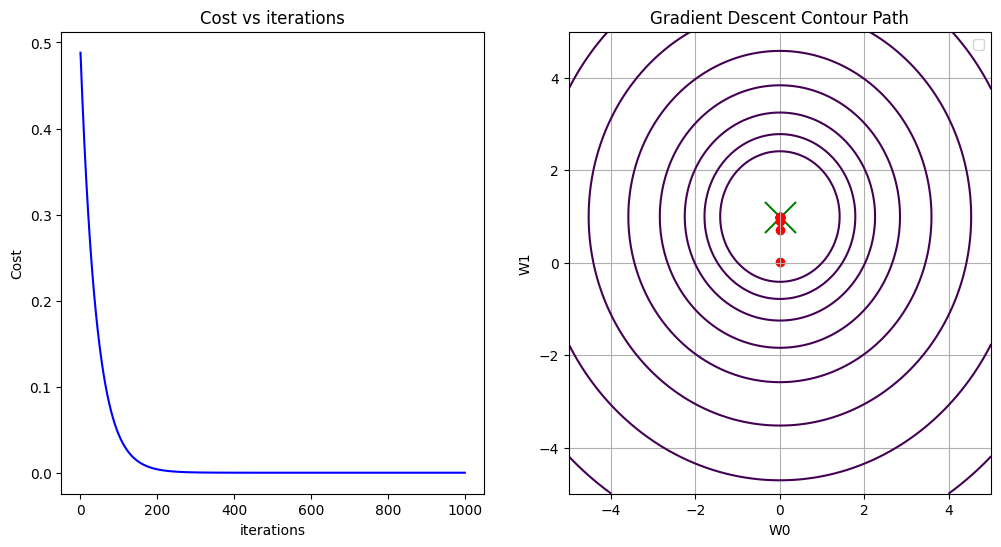

In [10]:
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)
Y_train_mean = np.mean(Y_train)
Y_train_std = np.std(Y_train)
X_norm = normalize(X_train, X_train_mean, X_train_std)
Y_norm = normalize(Y_train, Y_train_mean, Y_train_std)
epochs = 1000
learning_rate = 0.001
W, J_history, W_history = gradient_descent(np.c_[np.ones(X_norm.shape[0]), X_norm], Y_norm, epochs, learning_rate)

print(f'Weights = {W}')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title('Cost vs iterations')
plt.plot(range(1, epochs + 1), J_history, label='Cost', color='blue')

plt.subplot(1, 2, 2)
W0_vals = np.linspace(-5, 5, 100)
weight1_vals = np.linspace(-5, 5, 100)
J_vals = np.zeros((len(W0_vals), len(weight1_vals)))
for i, W0 in enumerate(W0_vals):
    for j, weight1 in enumerate(weight1_vals):
        J_vals[i, j] = cost_function(np.c_[np.ones(X_norm.shape[0]), X_norm], np.array([W0, weight1]), Y_norm)
plt.contour(W0_vals, weight1_vals, J_vals.T, levels=np.logspace(0, 20, 100), cmap='viridis')
plt.scatter(W[0], W[1], s=500, marker='x', color='green')
plt.scatter(W_history[0], W_history[1], marker='o', color='red') # see the blue converging from (0, 0) to green
plt.xlabel('W0')
plt.ylabel('W1')
plt.title('Contour Plot of Cost Function')
plt.legend()
plt.grid()
plt.title('Gradient Descent Contour Path')

plt.show()



### Testing

Predicted price = [ 197.91834196  655.5241282  1165.08515655 1352.92333955 1686.63585616
 3153.37230639]


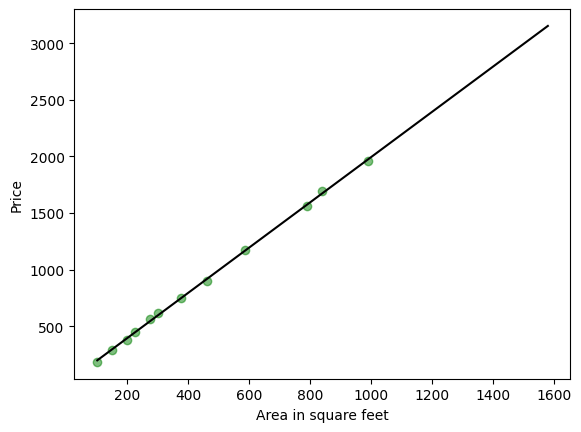

In [11]:
# For the give test area predict price
# X_test = np.random.randint(500, 3500, 10)
X_test = np.array([101, 330, 585, 679, 846, 1580])
X_test_norm = normalize(X_test, X_train_mean, X_train_std)
Y_predicted_norm = hypothesis_function(np.c_[np.ones(X_test_norm.shape[0]), X_test_norm], W)
Y_predicted = de_normalize(Y_predicted_norm, Y_train_mean, Y_train_std)

print(f'Predicted price = {Y_predicted}')

plt.xlabel('Area in square feet')
plt.ylabel('Price')
plt.scatter(X_train, Y_train, label='Train data', color='green', alpha=0.5)
plt.plot(X_test, Y_predicted, color='k', label='Model prediction')
plt.show()